In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [4]:
df = pd.read_csv(r'C:\Users\Kshitij\OneDrive\Desktop\Data Science-20251203T045627Z-3-001\Data Science\Air Quality Analysis-20251205T182137Z-3-001\Air Quality Analysis\delhiaqi.csv')
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [5]:
df.columns.tolist()

['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

In [6]:
date_column = 'Date'

In [7]:
if date_column in df.columns:
    df[date_column] = pd.to_datetime(df[date_column])
    df['Month'] = df[date_column].dt.month
    df['Season'] = df['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                   3: 'Spring', 4: 'Spring', 5: 'Spring',
                                   6: 'Summer', 7: 'Summer', 8: 'Summer',
                                   9: 'Monsoon', 10: 'Monsoon', 11: 'Monsoon'})

In [12]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB
None


In [11]:
print("\nFirst few rows:")
print(df.head())


First few rows:
                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  


In [9]:
print(df.isnull().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [10]:
print(df.describe())

                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%     2590.180000   13.300000   63.750000   11.800000   47.210000   
75%     4432.680000   59.010000   97.330000   47.210000   77.250000   
max    16876.220000  425.580000  263.210000  164.510000  511.170000   

             pm2_5         pm10         nh3  
count   561.000000   561.000000  561.000000  
mean    358.256364   420.988414   26.425062  
std     227.359117   271.287026   36.563094  
min      60.100000    69.080000    0.630000  
25%     204.450000   240.900000    8.230000  
50%     301.170000   340.900000   14.820000  
75%     416.650000   482.570000   26.3

In [13]:
# 1. Key pollutants contributing to AQI
pollutant_columns = [col for col in df.columns if 'PM' in col or 'NO' in col or 'SO' in col or 'CO' in col or 'O3' in col]
print("\nKey Pollutants:", pollutant_columns)


Key Pollutants: []


In [15]:
# 2. Seasonal variation in AQI
if 'Season' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Season', y='AQI')
    plt.title('AQI by Season')
    plt.xlabel('Season')
    plt.ylabel('AQI')
    plt.show()
    
    # ANOVA test for seasonal variation
    groups = [df[df['Season'] == season]['AQI'].dropna() for season in df['Season'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"\nANOVA F-statistic: {f_stat}, p-value: {p_value}")
    print("Significant seasonal variation" if p_value < 0.05 else "No significant seasonal variation")

In [19]:
print("Column names in the dataset:")
print(df.columns.tolist())

Column names in the dataset:
['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']


In [36]:
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month

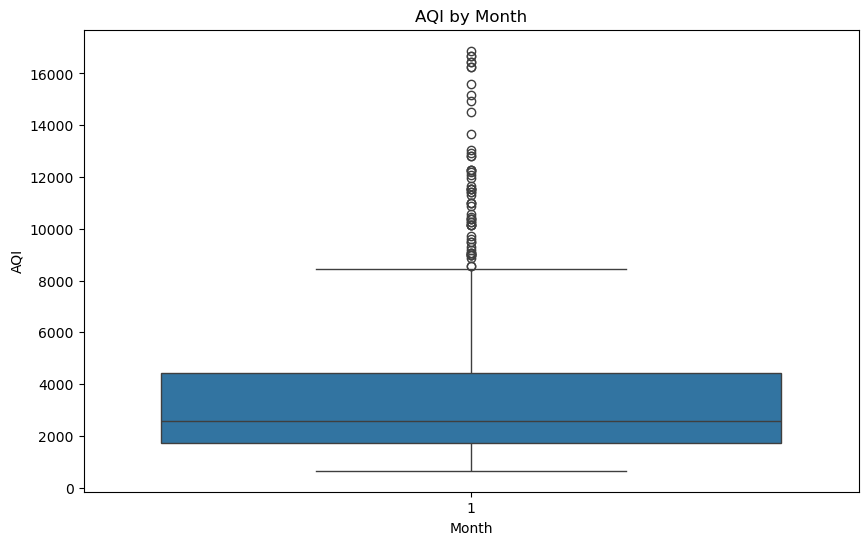

In [37]:
# Group by month instead of season if only one season is present
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='AQI')
plt.title('AQI by Month')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()

In [38]:

# Extract month and assign season
df['Month'] = df['date'].dt.month
df['Season'] = df['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                               3: 'Spring', 4: 'Spring', 5: 'Spring',
                               6: 'Summer', 7: 'Summer', 8: 'Summer',
                               9: 'Monsoon', 10: 'Monsoon', 11: 'Monsoon'})

In [39]:
# Calculate AQI (using the highest pollutant value as a simplified AQI)
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
df['AQI'] = df[pollutants].max(axis=1)

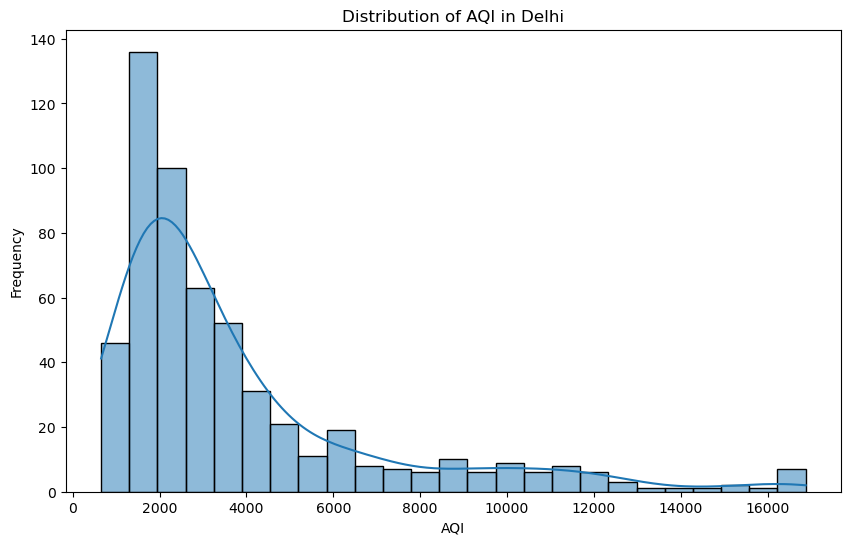

In [40]:
# Distribution of AQI
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], kde=True)
plt.title('Distribution of AQI in Delhi')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

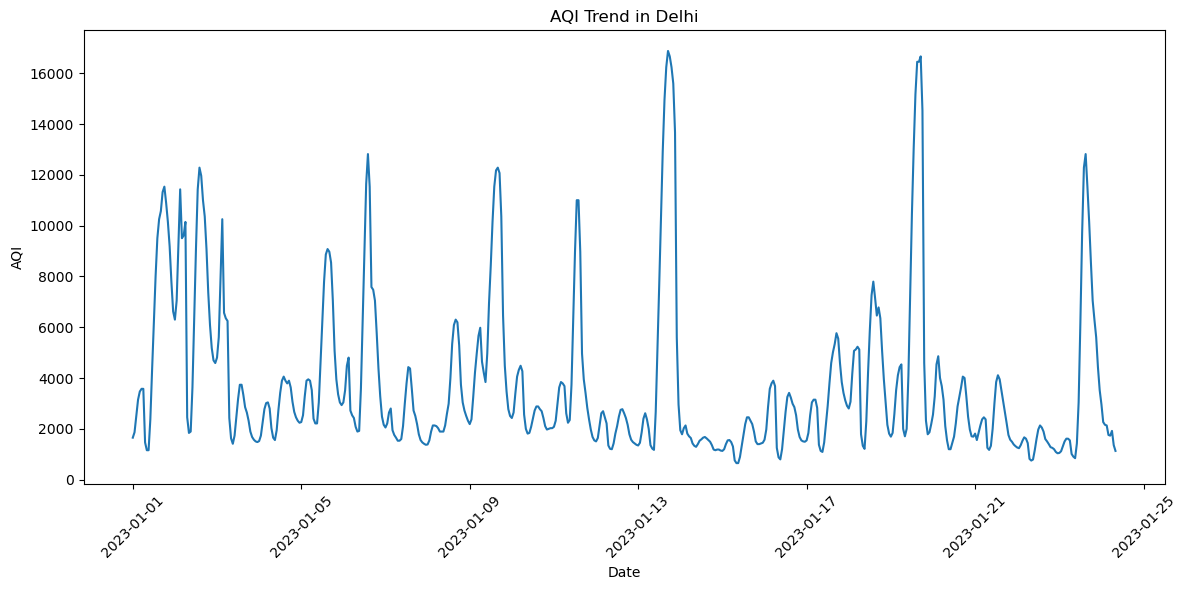

In [41]:
# AQI trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='AQI')
plt.title('AQI Trend in Delhi')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


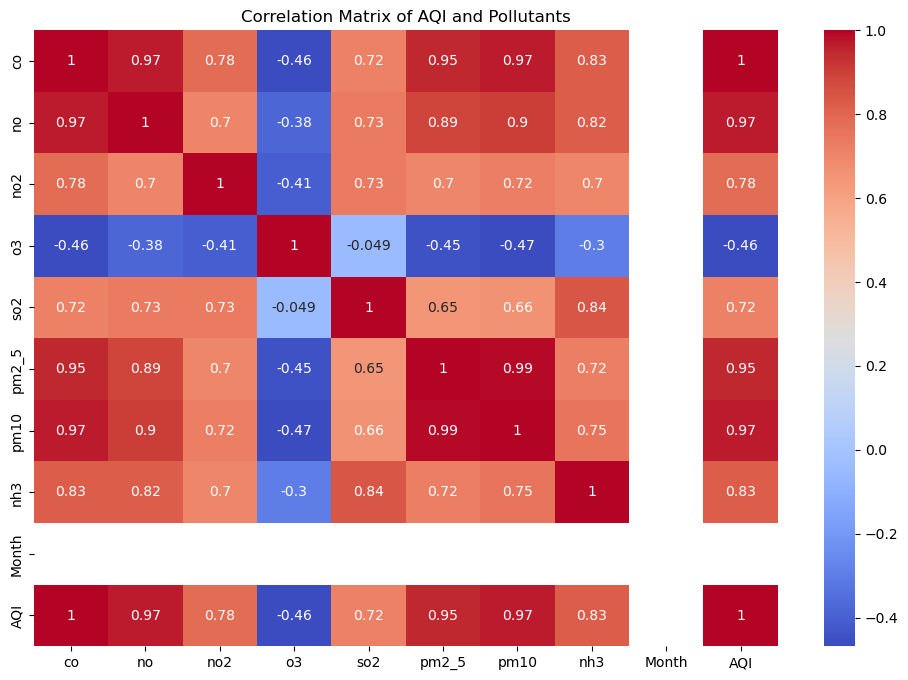

In [42]:
# Correlation matrix of pollutants and AQI
numeric_columns = df.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of AQI and Pollutants')
plt.show()

In [43]:
# Seasonal variation in AQI
if 'Season' in df.columns and df['Season'].nunique() > 1:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Season', y='AQI')
    plt.title('AQI by Season')
    plt.xlabel('Season')
    plt.ylabel('AQI')
    plt.show()
    
    # ANOVA test for seasonal variation
    groups = [df[df['Season'] == season]['AQI'].dropna() for season in df['Season'].unique()]
    if len(groups) > 1:
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")
    else:
        print("Not enough seasons for ANOVA test.")
else:
    print("Season data is missing or only one season present.")


Season data is missing or only one season present.
